# Plot Ellipses With Scatterplot
Original source: http://stackoverflow.com/questions/2397097/how-can-a-data-ellipse-be-superimposed-on-a-ggplot2-scatterplot

In [5]:
# create a dataframe of simulated data
x <- c(2,3,4, 10,12,10, 20,21,23)
y <- c(50,54,49, 30,25,26, 5,6,5)
group <- c("a", "a", "a", "b", "b", "b", "c", "c", "c")
df <- data.frame(x,y, group)
rm(x, y, group)

In [6]:
# load packages
library(ggplot2)
library(ellipse)

In [7]:
# calculating the ellipses by df$group
# create an empty dataframe
df_ell <- data.frame()
# for each level in df$groups 
for(g in levels(df$group)){
  # create 100 points per variable around the mean of each group
  df_ell <- rbind(df_ell, cbind(as.data.frame(with(df[df$group==g,], ellipse(cor(x, y), 
                                                                             scale=c(sd(x),sd(y)), 
                                                                             centre=c(mean(x),mean(y))
                                                                             )
                                                   )
                                              ),
                                group=g))
}

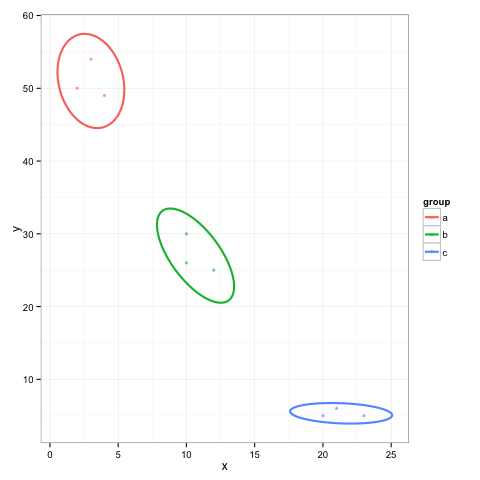

In [8]:
# create the ggplot with points colored by grouo
ggplot(data=df, aes(x=x, y=y,colour=group)) + 
  # draw points
  geom_point(size=1.5, alpha=.6) +
  # draw ellipse lines
  geom_path(data=df_ell, aes(x=x, y=y,colour=group), size=1, linetype=1) +
  # style as black and white theme
  theme_bw()